## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,RobustScaler , MinMaxScaler

### Loading Dataset

In [2]:
car = pd.read_excel('car-prices_unclean - car-prices_unclean copy.xlsx')
car.head()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Untitled
0,0,1.0,NaN,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,1,2.0,3.0,alfa-romero stelvio,NaN,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,2,NaN,NaN,alfa-romero Quadrifoglio,NaN,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,4,NaN,2.0,audi 100ls,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN


In [3]:
# MAKING COPY OF DATA
df = car.copy()

In [4]:
df.head()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Untitled
0,0,1.0,NaN,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,1,2.0,3.0,alfa-romero stelvio,NaN,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,2,NaN,NaN,alfa-romero Quadrifoglio,NaN,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,4,NaN,2.0,audi 100ls,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            164 non-null    float64
 2   symboling         164 non-null    float64
 3   CarName           205 non-null    object 
 4   fueltype          164 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

In [6]:
df.isnull().sum()

Unnamed: 0            0
car_ID               41
symboling            41
CarName               0
fueltype             41
aspiration            0
doornumber            0
carbody               0
drivewheel            0
enginelocation        0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginetype            0
cylindernumber        0
enginesize            0
fuelsystem            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                41
Untitled            205
dtype: int64

### Fitering data

In [7]:
df.head()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Untitled
0,0,1.0,NaN,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,1,2.0,3.0,alfa-romero stelvio,NaN,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,2,NaN,NaN,alfa-romero Quadrifoglio,NaN,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,4,NaN,2.0,audi 100ls,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN


In [8]:
df.columns

Index(['Unnamed: 0', 'car_ID', 'symboling', 'CarName', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'Untitled'],
      dtype='object')

In [9]:
df.drop(['Unnamed: 0','Untitled'],axis = 1 , inplace = True)

In [10]:
df.drop('car_ID',axis = 1 , inplace = True)

In [11]:
def split(x):
    return x.split()[0]

In [12]:
df['Manufacturer'] = df['CarName'].apply(split)

In [13]:
def split(x):
    return x.split()[-1]

In [14]:
df['Model'] =df['CarName'].apply(split)

In [15]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Manufacturer,Model
0,NaN,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3.0,alfa-romero stelvio,NaN,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,NaN,alfa-romero Quadrifoglio,NaN,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,ls
4,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [16]:
df.drop(['CarName', 'Model'],axis=1 , inplace = True)

In [17]:
df['Manufacturer'] = df['Manufacturer'].replace({'maxda':'mazda'})

In [18]:
df['Manufacturer'] = df['Manufacturer'].replace({'vokswagen':'volkswagen'})

In [19]:
df['Manufacturer'] = df['Manufacturer'].replace({'porcshce':'porsche'})

In [20]:
df['Manufacturer'] = df['Manufacturer'].replace({'nissan':'Nissan'})

In [21]:
df['Manufacturer'] = df['Manufacturer'].replace({'plymouth':'peugeot'})

In [22]:
df['Manufacturer'] = df['Manufacturer'].replace({'vw':'volkswagen'})

In [23]:
df['Manufacturer'] = df['Manufacturer'].replace({'toyouta':'toyota'})

In [24]:
df.groupby('Manufacturer').count()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
Manufacturer,,,,,,,,,,,,,,,,,,,,,
Nissan,12,14,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,12
alfa-romero,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,6,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,7,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,6,7,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,7
chevrolet,3,2,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,8,7,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,10,11,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,9
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2


In [25]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Manufacturer
0,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3.0,NaN,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,NaN,NaN,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2.0,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,NaN,volvo
201,NaN,NaN,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,NaN,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,NaN,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


### Missing values

In [26]:
Numerical= []
Categorical = []
for col in df:
    if df[col].dtypes != 'O':
        Numerical.append(col)
    else:
        Categorical.append(col)
print(Numerical,'='*147)
print(Categorical )
        

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] ===================================================================================================================================================
['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Manufacturer']


In [27]:
df[Numerical].isnull().sum()

symboling           41
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginesize           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price               41
dtype: int64

In [28]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Manufacturer
0,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3.0,NaN,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,NaN,NaN,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2.0,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [29]:
#RANDOM IMPUTATION ---

# df['car_ID'].fillna(df['car_ID'].mode().values[0],inplace = True)
df['symboling'].fillna(df['symboling'].mode().values[0],inplace = True)
df['wheelbase'].fillna(df['wheelbase'].mode().values[0],inplace = True)
df['price'].fillna(df['price'].mode(),inplace = True)
df['fueltype'].fillna(df['fueltype'].mode().values[0],inplace = True)


In [30]:
df.isnull().sum()

symboling            0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price               41
Manufacturer         0
dtype: int64

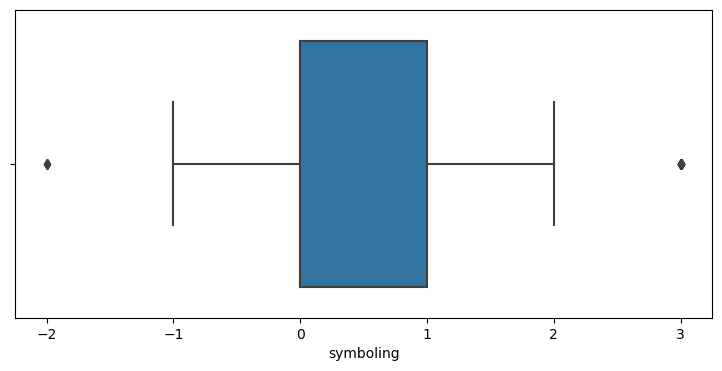

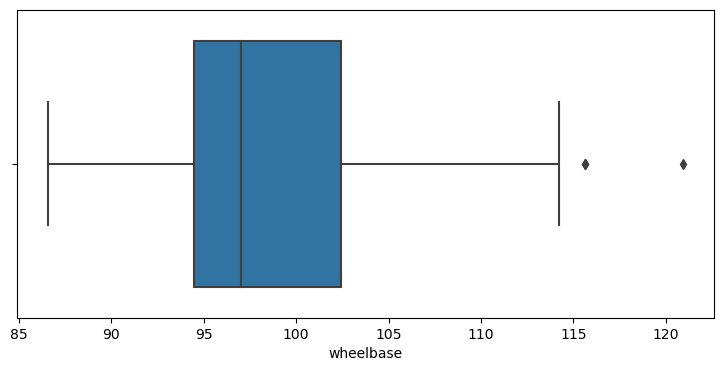

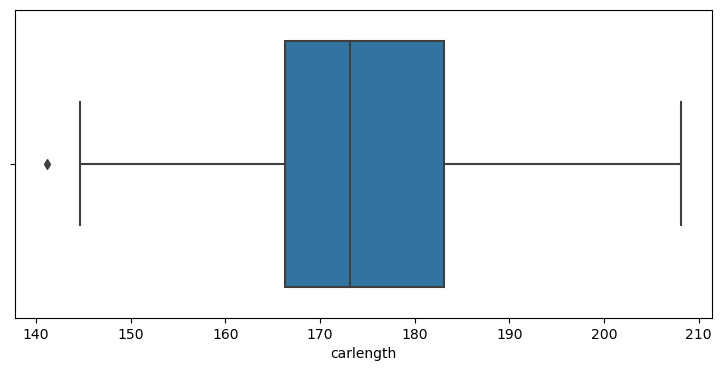

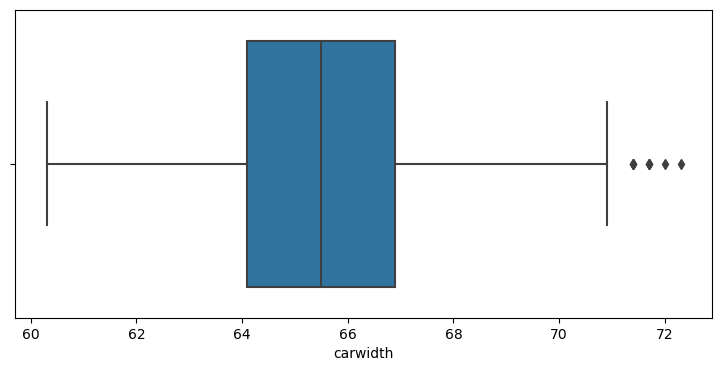

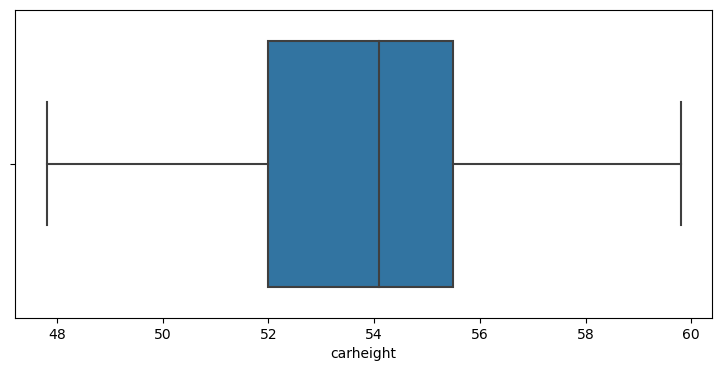

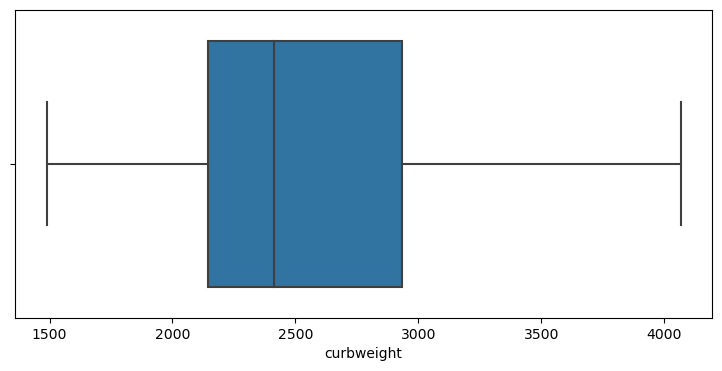

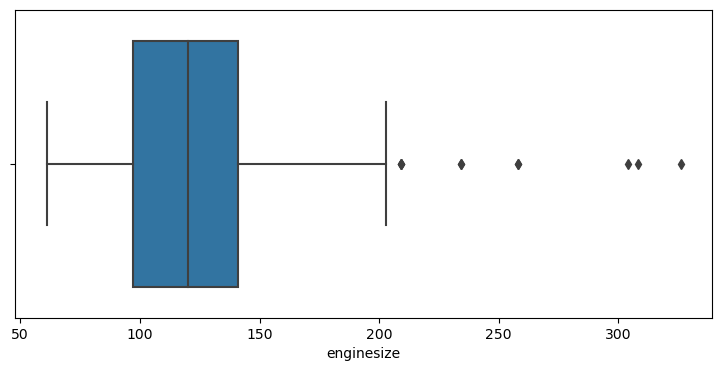

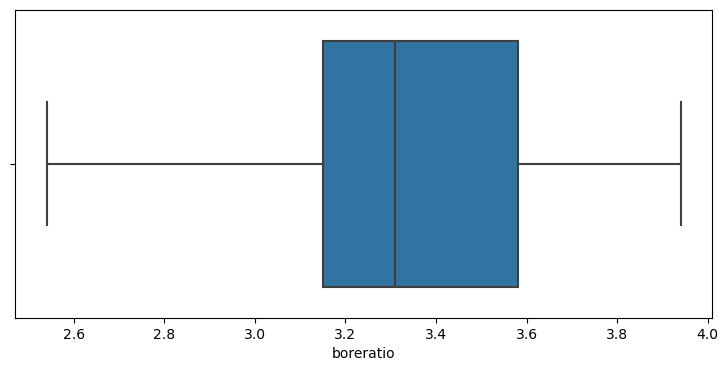

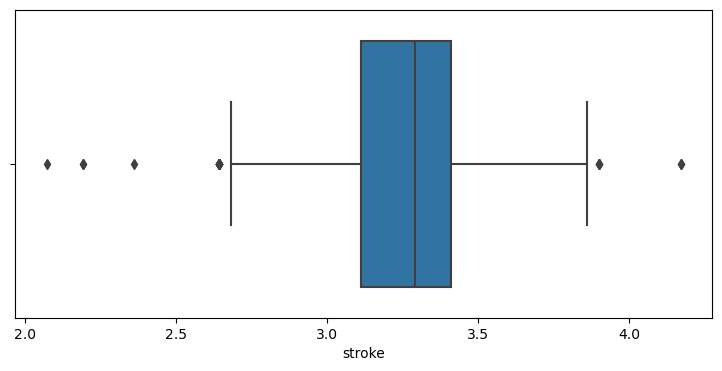

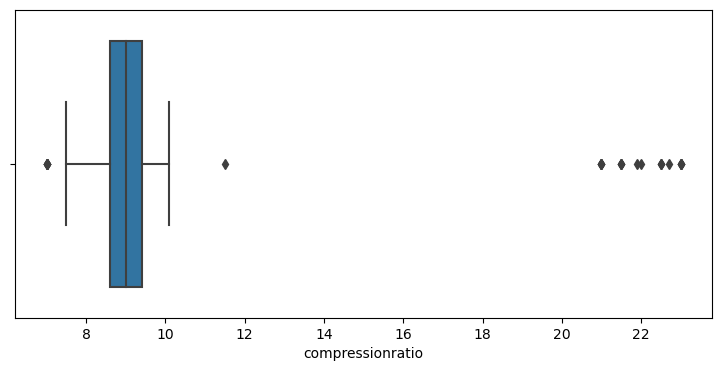

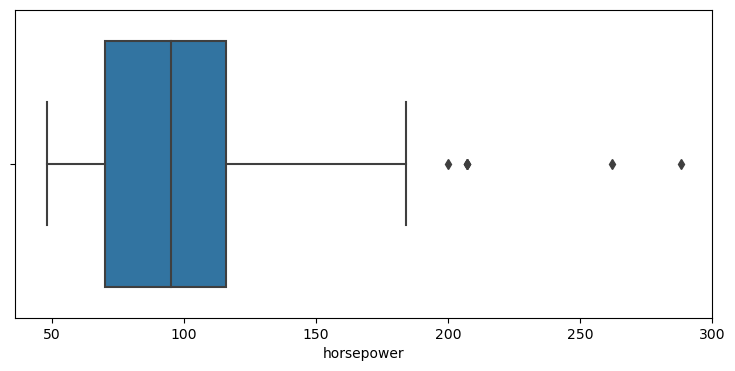

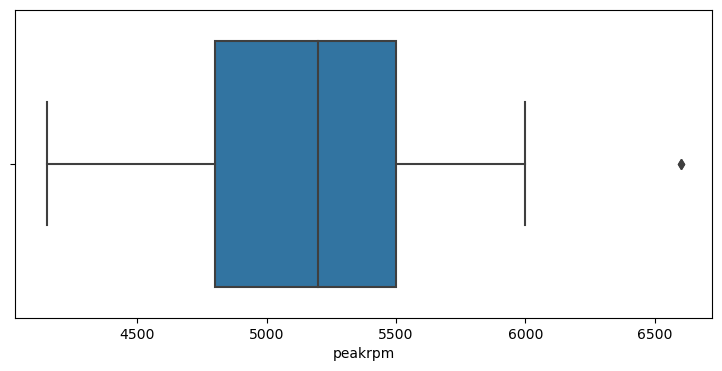

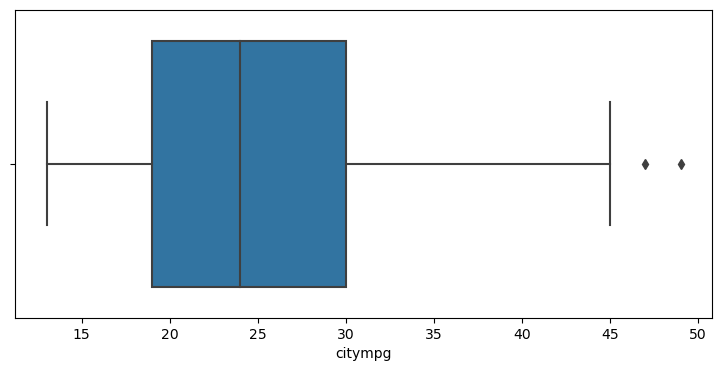

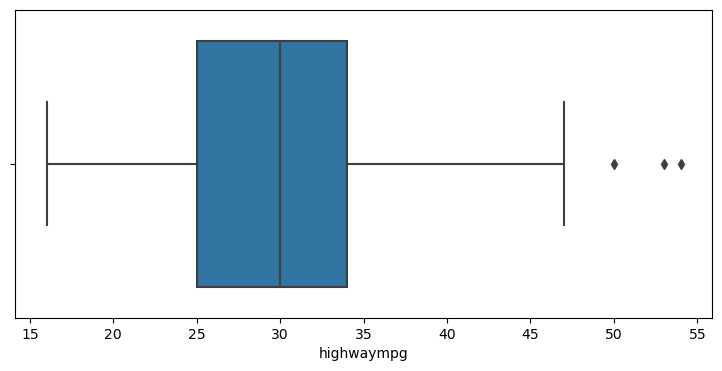

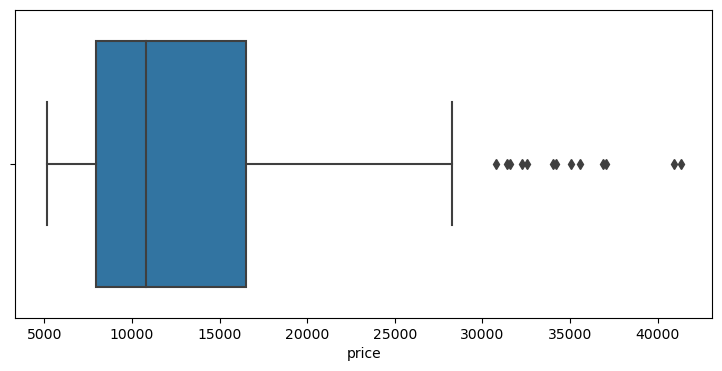

In [31]:
for col in Numerical:
    plt.figure(figsize=(9,4))
    sns.boxplot(df , x = col)

### Tackling _Outliers

## Engine_size

In [32]:
percent25 = np.quantile(df['enginesize'],0.25)
percent75 = np.quantile(df['enginesize'],0.75)

IQR = percent75 - percent25

upper_limit = percent75 + 1.5 * IQR
lower_limit = percent25 - 1.5 * IQR

In [33]:
print('upper_limit = ',upper_limit )
print('lower_limit = ',lower_limit)

upper_limit =  207.0
lower_limit =  31.0


In [34]:
df['enginesize'] = np.where(
    df['enginesize'] > upper_limit,
    upper_limit,
    np.where(
    df['enginesize'] < lower_limit,
    lower_limit,
        df['enginesize']
    )
)

<Axes: >

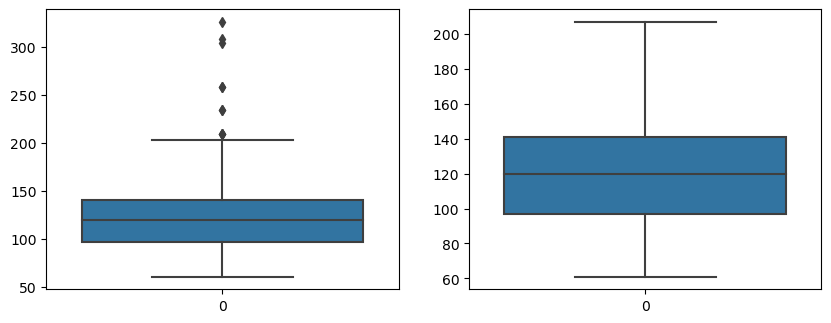

In [35]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['enginesize'])

plt.subplot(2,2,2)
sns.boxplot(df['enginesize'])

## Highwaypg

In [36]:
percent25 = np.quantile(df['highwaympg'],0.25)
percent75 = np.quantile(df['highwaympg'],0.75)

IQR = percent75 - percent25

upper_limit1 = percent75 + 1.5 * IQR
lower_limit1 = percent25 - 1.5 * IQR

In [37]:
print('upper_limit = ',upper_limit1 )
print('lower_limit = ',lower_limit1)

upper_limit =  47.5
lower_limit =  11.5


In [38]:
df['highwaympg'] = np.where(
    df['highwaympg'] > upper_limit1,
    upper_limit1,
    np.where(
    df['highwaympg'] < lower_limit1,
    lower_limit1,
        df['highwaympg']
    )
)

<Axes: >

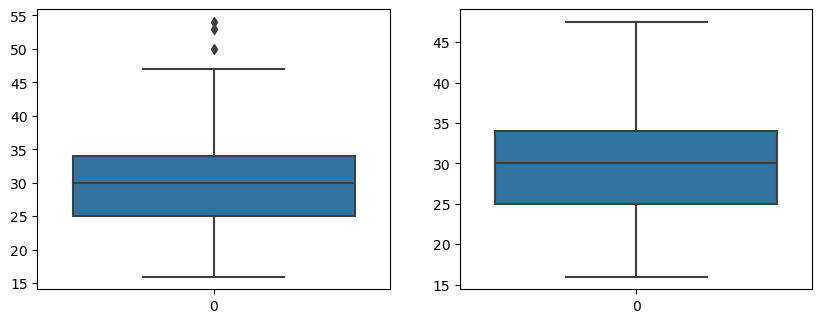

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['highwaympg'])

plt.subplot(2,2,2)
sns.boxplot(df['highwaympg'])

## Horsepower

In [40]:
percent25 = np.quantile(df['horsepower'],0.25)
percent75 = np.quantile(df['horsepower'],0.75)

IQR = percent75 - percent25

upper_limit2 = percent75 + 1.5 * IQR
lower_limit2 = percent25 - 1.5 * IQR

In [41]:
print('upper_limit = ',upper_limit2)
print('lower_limit = ',lower_limit2)

upper_limit =  185.0
lower_limit =  1.0


In [42]:
df['horsepower'] = np.where(
    df['horsepower'] > upper_limit2,
    upper_limit2,
    np.where(
    df['horsepower'] < lower_limit2,
    lower_limit2,
        df['horsepower']
    )
)

<Axes: >

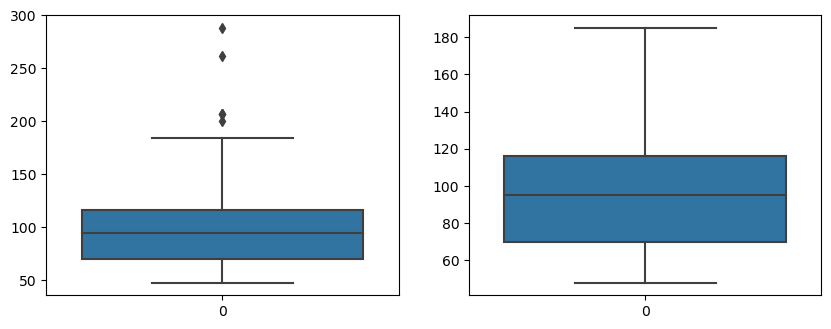

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['horsepower'])

plt.subplot(2,2,2)
sns.boxplot(df['horsepower'])

## Citympg

In [44]:
percent25 = np.quantile(df['citympg'],0.25)
percent75 = np.quantile(df['citympg'],0.75)

IQR = percent75 - percent25

upper_limit3 = percent75 + 1.5 * IQR
lower_limit3 = percent25 - 1.5 * IQR

In [45]:
print('upper_limit = ',upper_limit3)
print('lower_limit = ',lower_limit3)

upper_limit =  46.5
lower_limit =  2.5


In [46]:
df['citympg'] = np.where(
    df['citympg'] > upper_limit3,
    upper_limit3,
    np.where(
    df['citympg'] < lower_limit3,
    lower_limit3,
        df['citympg']
    )
)

<Axes: >

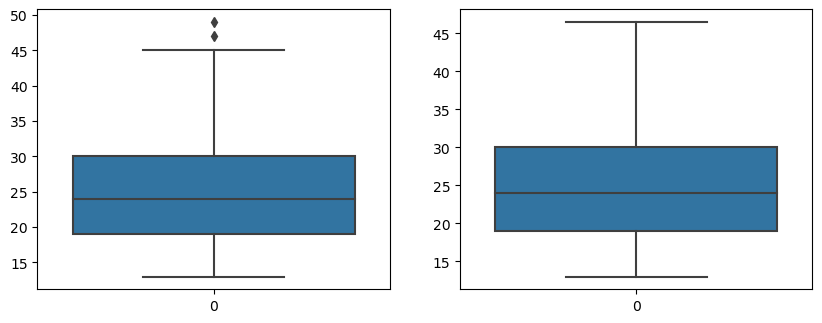

In [47]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['citympg'])

plt.subplot(2,2,2)
sns.boxplot(df['citympg'])

## compressionte

In [48]:
percent25 = np.quantile(df['compressionratio'],0.25)
percent75 = np.quantile(df['compressionratio'],0.75)

IQR = percent75 - percent25

upper_limit4 = percent75 + 1.5 * IQR
lower_limit4 = percent25 - 1.5 * IQR

In [49]:
print('upper_limit = ',upper_limit4)
print('lower_limit = ',lower_limit4)

upper_limit =  10.600000000000001
lower_limit =  7.399999999999999


In [50]:
df['compressionratio'] = np.where(
    df['compressionratio'] > upper_limit4,
    upper_limit4,
    np.where(
    df['compressionratio'] < lower_limit4,
    lower_limit4,
        df['compressionratio']
    )
)

<Axes: >

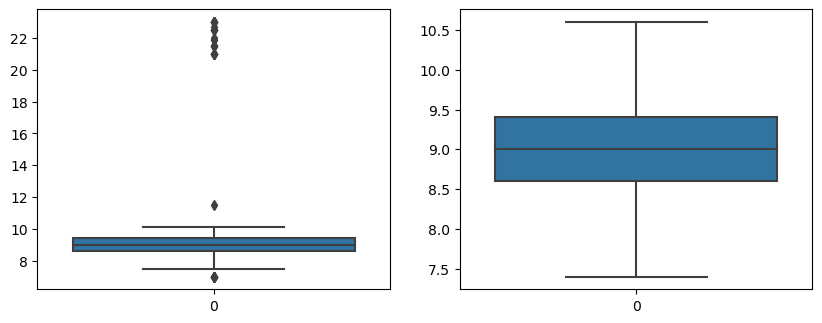

In [51]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['compressionratio'])

plt.subplot(2,2,2)
sns.boxplot(df['compressionratio'])

## Price

In [52]:
percent25 = np.quantile(df['price'],0.25)
percent75 = np.quantile(df['price'],0.75)

IQR = percent75 - percent25

upper_limit5 = percent75 + 1.5 * IQR
lower_limit5 = percent25 - 1.5 * IQR

In [53]:
print('upper_limit = ',upper_limit5)
print('lower_limit = ',lower_limit5)

upper_limit =  nan
lower_limit =  nan


In [54]:
df['price'] = np.where(
    df['price'] > upper_limit5,
    upper_limit5,
    np.where(
    df['price'] < lower_limit5,
    lower_limit5,
        df['price']
    )
)

<Axes: >

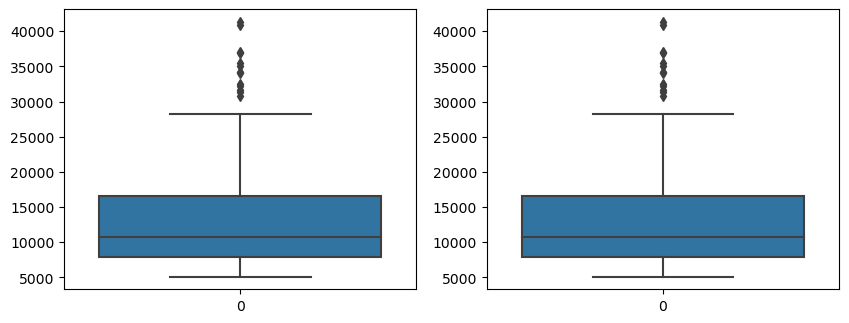

In [55]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['price'])

plt.subplot(2,2,2)
sns.boxplot(df['price'])

## Peakrpm

In [56]:
percent25 = np.quantile(df['peakrpm'],0.25)
percent75 = np.quantile(df['peakrpm'],0.75)

IQR = percent75 - percent25

upper_limit6 = percent75 + 1.5 * IQR
lower_limit6 = percent25 - 1.5 * IQR

In [57]:
print('upper_limit = ',upper_limit6)
print('lower_limit = ',lower_limit6)

upper_limit =  6550.0
lower_limit =  3750.0


In [58]:
df['peakrpm'] = np.where(
    df['peakrpm'] > upper_limit6,
    upper_limit6,
    np.where(
    df['peakrpm'] < lower_limit6,
    lower_limit6,
        df['peakrpm']
    )
)

<Axes: >

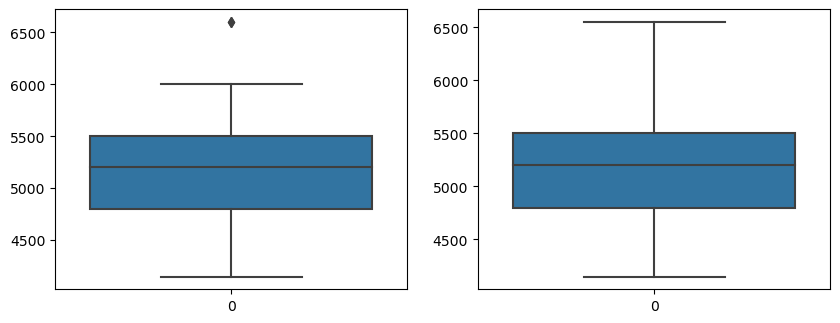

In [59]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['peakrpm'])

plt.subplot(2,2,2)
sns.boxplot(df['peakrpm'])

## Stroke

In [60]:
percent25 = np.quantile(df['stroke'],0.25)
percent75 = np.quantile(df['stroke'],0.75)

IQR = percent75 - percent25

upper_limit7 = percent75 + 1.5 * IQR
lower_limit7 = percent25 - 1.5 * IQR

In [61]:
print('upper_limit = ',upper_limit7)
print('lower_limit = ',lower_limit7)

upper_limit =  3.8600000000000003
lower_limit =  2.6599999999999993


In [62]:
df['stroke'] = np.where(
    df['stroke'] > upper_limit7,
    upper_limit7,
    np.where(
    df['stroke'] < lower_limit7,
    lower_limit7,
        df['stroke']
    )
)

<Axes: >

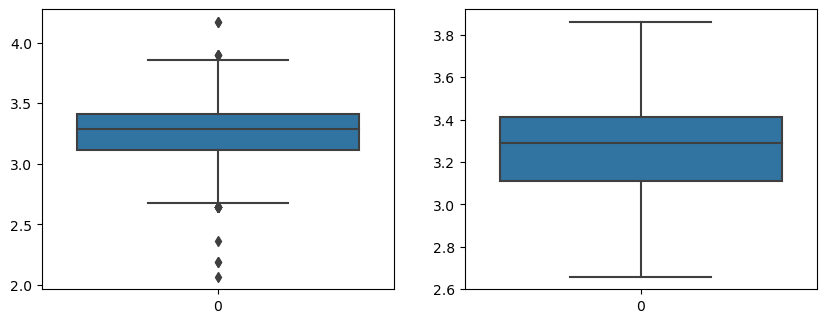

In [63]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['stroke'])

plt.subplot(2,2,2)
sns.boxplot(df['stroke'])

## Car_width

In [64]:
percent25 = np.quantile(df['carwidth'],0.25)
percent75 = np.quantile(df['carwidth'],0.75)

IQR = percent75 - percent25

upper_limit8 = percent75 + 1.5 * IQR
lower_limit8 = percent25 - 1.5 * IQR

In [65]:
print('upper_limit = ',upper_limit8)
print('lower_limit = ',lower_limit8)

upper_limit =  71.10000000000002
lower_limit =  59.89999999999998


In [66]:
df['carwidth'] = np.where(
    df['carwidth'] > upper_limit8,
    upper_limit8,
    np.where(
    df['carwidth'] < lower_limit8,
    lower_limit8,
        df['carwidth']
    )
)

<Axes: >

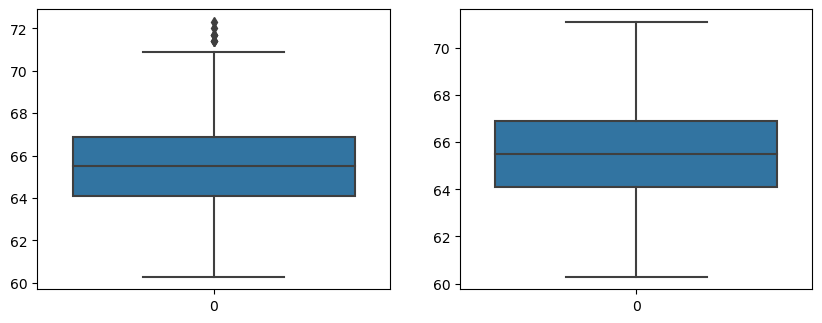

In [67]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['carwidth'])

plt.subplot(2,2,2)
sns.boxplot(df['carwidth'])

## Symboling

In [68]:
percent25 = np.quantile(df['symboling'],0.25)
percent75 = np.quantile(df['symboling'],0.75)

IQR = percent75 - percent25

upper_limit9 = percent75 + 1.5 * IQR
lower_limit9 = percent25 - 1.5 * IQR

In [69]:
print('upper_limit = ',upper_limit9)
print('lower_limit = ',lower_limit9)

upper_limit =  2.5
lower_limit =  -1.5


In [70]:
df['symboling'] = np.where(
    df['symboling'] > upper_limit9,
    upper_limit9,
    np.where(
    df['symboling'] < lower_limit9,
    lower_limit9,
        df['symboling']
    )
)

<Axes: >

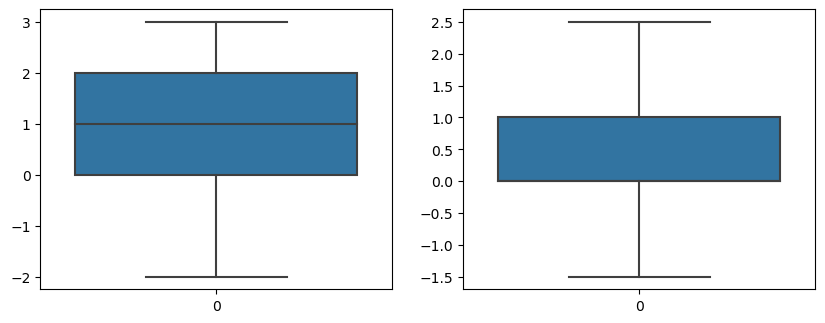

In [71]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['symboling'])

plt.subplot(2,2,2)
sns.boxplot(df['symboling'])

## Wheel_base

In [72]:
percent25 = np.quantile(df['wheelbase'],0.25)
percent75 = np.quantile(df['wheelbase'],0.75)

IQR = percent75 - percent25

upper_limit10 = percent75 + 1.5 * IQR
lower_limit10 = percent25 - 1.5 * IQR

In [73]:
print('upper_limit = ',upper_limit10)
print('lower_limit = ',lower_limit10)

upper_limit =  114.25000000000001
lower_limit =  82.64999999999999


In [74]:
df['wheelbase'] = np.where(
    df['wheelbase'] > upper_limit10,
    upper_limit10,
    np.where(
    df['wheelbase'] < lower_limit10,
    lower_limit10,
        df['wheelbase']
    )
)

<Axes: >

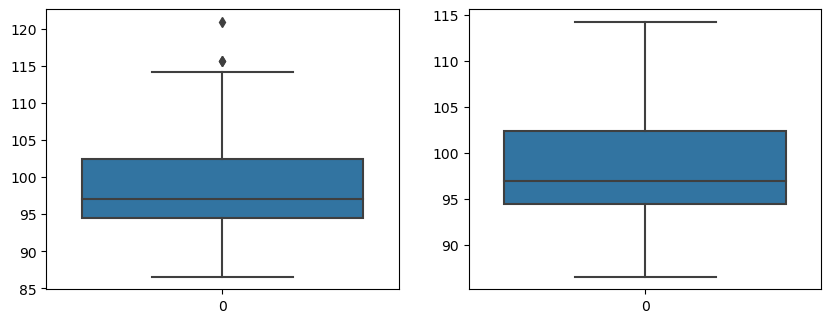

In [75]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(car['wheelbase'])

plt.subplot(2,2,2)
sns.boxplot(df['wheelbase'])

## Exploratory Data Analysis

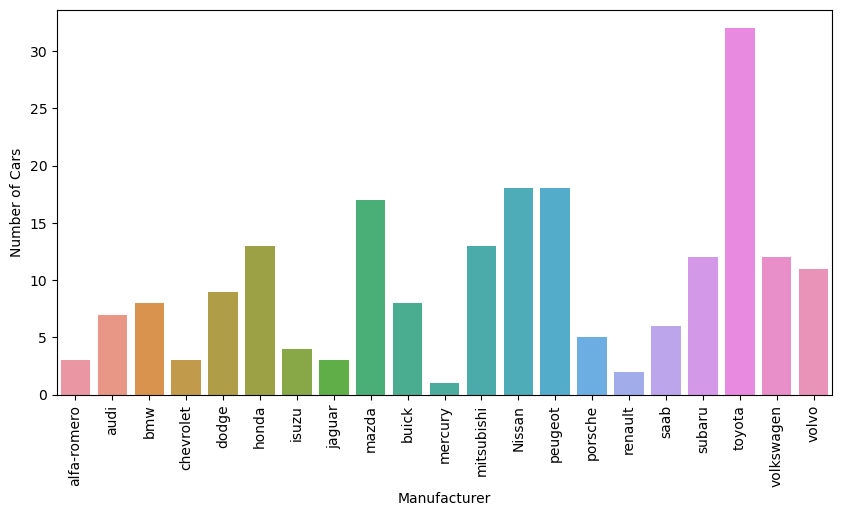

In [76]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()


#### Above Graph shows that in Terms of Manufacturer Toyata has High Rating

In [77]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Manufacturer
0,0.0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero
1,2.5,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero
2,0.0,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,alfa-romero
3,2.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,audi
4,2.0,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,audi


In [78]:
ax = df.groupby('Manufacturer')['price'].sum().head()

In [79]:
df['price'].dtypes

dtype('float64')

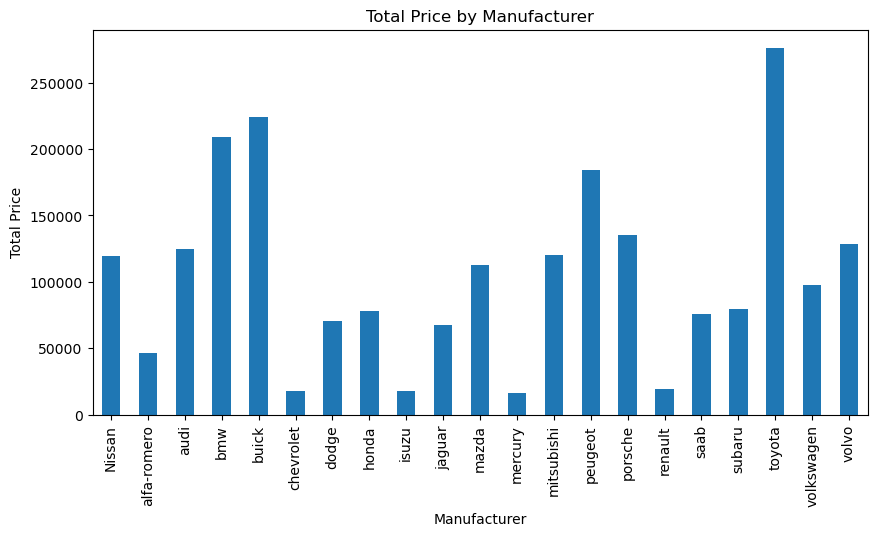

In [80]:
plt.figure(figsize=(10,5))
ax = df.groupby('Manufacturer')['price'].sum()
ax.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Total Price')
plt.title('Total Price by Manufacturer')
plt.show()


#### This Graph shows that Toyata has Highest Price which is approximately 275955.000 and on The other hands Mercury has very Low price 

In [81]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Manufacturer
0,0.0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero
1,2.5,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero
2,0.0,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,alfa-romero
3,2.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,audi
4,2.0,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,audi


In [82]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Manufacturer'],
      dtype='object')

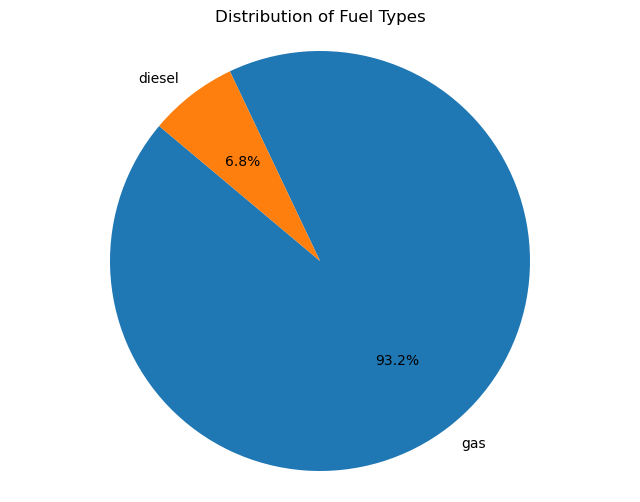

In [83]:
fueltype_counts = df['fueltype'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(fueltype_counts, labels=fueltype_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fuel Types')
plt.axis('equal') 
plt.show()

## Making_model

In [84]:
X = df.drop('price', axis =1)
y = df['price']

In [85]:
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size = 0.7)

In [86]:
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

In [87]:
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]

In [88]:
Categorical

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Manufacturer']

In [89]:
categorical_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Manufacturer']
numerical_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

### Using Column_Transformer Method

In [90]:
col_trans = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('simple', SimpleImputer(strategy='median'), numerical_features), 
        ('scaler', RobustScaler(), numerical_features)
    ],
    remainder='passthrough'
)

In [91]:
X_train_transformed = col_trans.fit_transform(X_train)
X_test_transformed = col_trans.transform(X_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Decission_Trees

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
Dt = DecisionTreeRegressor()

In [94]:
Dt

DecisionTreeRegressor()

In [95]:
Dt.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [96]:
y_pred = Dt.predict(X_test_transformed)

In [97]:
y_pred

array([ 9495. , 17950. , 12945. , 16558. ,  9895. , 12629. ,  7898. ,
        9538. , 12629. ,  9995. , 17450. ,  8845. , 36880. ,  8916.5,
       31600. ,  9495. ,  6488. ,  7898. , 12629. , 34028. , 12945. ,
        8558. , 17710. ,  9538. , 16515. , 16630. , 41315. ,  9495. ,
       13499. ,  8358. , 16500. , 37028. ,  6849. ,  8558. ,  9538. ,
        6692. , 11845. ,  7603. , 16500. , 16500. ,  8558. , 20970. ,
        9538. , 10898. , 11245. ,  8845. ,  5389. , 16558. , 18344. ,
        8558. ])

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2357.86334
Mean Squared Error: 12067211.952677779
Root Mean Squared Error: 3473.789278680815
R-squared: 0.8046015125831558


### Random_Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor()

In [102]:
rf

RandomForestRegressor()

In [103]:
rf.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [104]:
yp_red = rf.predict(X_test_transformed)

In [105]:
mae = mean_absolute_error(y_test, yp_red)
mse = mean_squared_error(y_test, yp_red)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, yp_red)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1559.64364
Mean Squared Error: 5579556.1567032775
Root Mean Squared Error: 2362.1084134102052
R-squared: 0.9096529639362776


In [106]:
rf2 = RandomForestRegressor(n_estimators=21000,max_depth=2)
rf2.fit(X_train_transformed,y_train)
ypred = rf2.predict(X_test_transformed)

mae = mean_absolute_error(y_test, yp_red)
mse = mean_squared_error(y_test, yp_red)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, yp_red)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1559.64364
Mean Squared Error: 5579556.1567032775
Root Mean Squared Error: 2362.1084134102052
R-squared: 0.9096529639362776


### Linear_Regression

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr = LinearRegression()

In [109]:
lr

LinearRegression()

In [110]:
lr.fit(X_train_transformed, y_train)

LinearRegression()

In [111]:
Y_pred = lr.predict(X_test_transformed)

In [112]:
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2344.7572613751063
Mean Squared Error: 12441193.322962048
Root Mean Squared Error: 3527.207581495885
R-squared: 0.7985458143520985


### Adaboost_Method

In [113]:
from sklearn.ensemble import AdaBoostRegressor

In [114]:
ada = AdaBoostRegressor()

In [115]:
ada

AdaBoostRegressor()

In [116]:
ada.fit(X_train_transformed, y_train)

AdaBoostRegressor()

In [117]:
y_preds = ada.predict(X_test_transformed)

In [118]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1765.5256525086754
Mean Squared Error: 5904697.832387814
Root Mean Squared Error: 2429.958401369829
R-squared: 0.9043881030989871
